In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
from pprint import pprint
import openweathermapy.core as owm
import seaborn as sns
import numpy as np
from pprint import pprint

In [ ]:
#################################################################################################

In [ ]:
######################## EPA Data: Annual trends for 2016 and 2017 ##############################

In [3]:
#Import CSV data from the EPA's website to a DataFrame
sfb17_csv = "Raw_Data/EPA_AQI_2017_SFBAY.csv"
sfb17_data = pd.read_csv(sfb17_csv) #For 2017 (IMPORTANT: data available for Jan. - Sep.)
sfb16_csv = "Raw_Data/EPA_AQI_2016_SFBAY.csv"

sfb16_data = pd.read_csv(sfb16_csv) #For 2016 (Comprehensive for the whole of 2016)
print(sfb16_data.columns) #To view table's attributes
print(sfb17_data.columns) 
print("------------------------------")
print(sfb16_data.shape) #To view data's size
print(sfb17_data.shape)
# print("------------------------------")
# print(.dtypes) #To view attributes by type

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')
Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')
------------------------------
(3292, 10)
(2217, 10)


In [4]:
# Statistical Summary

print('2016')
print(sfb16_data.AQI.describe())
print("------------------------------")
print('2017')
print(sfb17_data.AQI.describe())

2016
count    3292.000000
mean       40.277035
std        14.063939
min        10.000000
25%        31.000000
50%        37.000000
75%        46.000000
max       154.000000
Name: AQI, dtype: float64
------------------------------
2017
count    2217.000000
mean       41.993234
std        13.450989
min        12.000000
25%        33.000000
50%        40.000000
75%        48.000000
max       180.000000
Name: AQI, dtype: float64


In [ ]:
####################################### PLOTS ####################################################

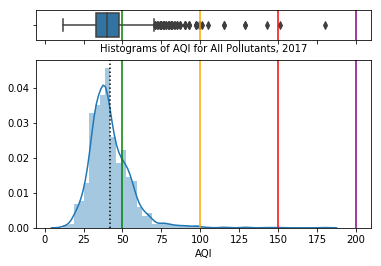

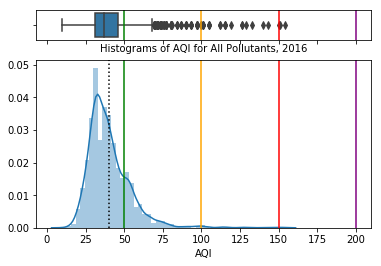

In [5]:
# Histograms

#2017
mean17_AQI = sfb17_data.AQI.mean()
############################ 2017
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part
sns.boxplot(sfb17_data.AQI, ax=ax_box)
sns.distplot(sfb17_data.AQI, ax=ax_hist)
plt.axvline(mean17_AQI, linestyle="dotted",color='black')

plt.axvline(50, color='g')
plt.axvline(100, color='orange')
plt.axvline(150, color='r')
plt.axvline(200, color='purple')

# Remove x axis name for the boxplot
ax_box.set(xlabel='Histograms of AQI for All Pollutants, 2017')
ax_box.axvline(50, color='g')
ax_box.axvline(100, color='orange')
ax_box.axvline(150, color='r')
ax_box.axvline(200, color='purple')

#2016
mean16_AQI = sfb16_data.AQI.mean()
############################ 2016
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(sfb16_data.AQI, ax=ax_box)
sns.distplot(sfb16_data.AQI, ax=ax_hist)
plt.axvline(mean16_AQI, linestyle="dotted",color='black')

plt.axvline(50, color='g')
plt.axvline(100, color='orange')
plt.axvline(150, color='r')
plt.axvline(200, color='purple')

ax_box.set(xlabel='Histograms of AQI for All Pollutants, 2016')
ax_box.axvline(50, color='g')
ax_box.axvline(100, color='orange')
ax_box.axvline(150, color='r')
ax_box.axvline(200, color='purple')

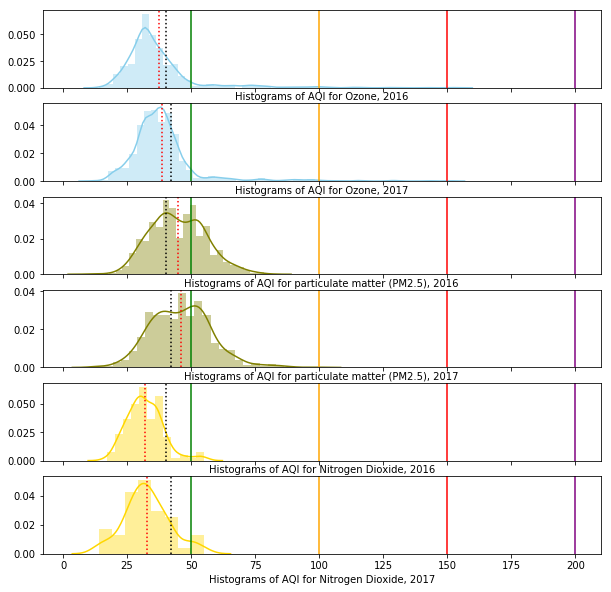

In [6]:
    ## Histogram of AQI's distribution by Pollutant Type

# source : https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn/

    
#Mean AQIs per pollutants
    #2016
m16_Oz=sfb16_data[sfb16_data["Defining Parameter"] == 'Ozone'].AQI.mean()
m16_Pm25=sfb16_data[sfb16_data["Defining Parameter"] == 'PM2.5'].AQI.mean()
m16_NO2=sfb16_data[sfb16_data["Defining Parameter"] == 'NO2'].AQI.mean()
    #2017
m17_Oz=sfb17_data[sfb17_data["Defining Parameter"] == 'Ozone'].AQI.mean()
m17_Pm25=sfb17_data[sfb17_data["Defining Parameter"] == 'PM2.5'].AQI.mean()
m17_NO2=sfb17_data[sfb17_data["Defining Parameter"] == 'NO2'].AQI.mean()

###########
f, axes = plt.subplots(6, 1, figsize=(10, 10), sharex=True)

sns.distplot( sfb16_data[sfb16_data["Defining Parameter"] == 'Ozone'].AQI , 
             color="skyblue", ax=axes[0],label = "Ozone")
axes[0].axvline(m16_Oz, linestyle="dotted",color='r')
axes[0].set(xlabel='Histograms of AQI for Ozone, 2016') #2016

sns.distplot( sfb17_data[sfb17_data["Defining Parameter"] == 'Ozone'].AQI , 
             color="skyblue", ax=axes[1],label = "Ozone")
axes[1].axvline(m17_Oz, linestyle="dotted",color='r')
axes[1].set(xlabel='Histograms of AQI for Ozone, 2017') #2017

sns.distplot( sfb16_data[sfb16_data["Defining Parameter"] == 'PM2.5'].AQI , 
             color="olive", ax=axes[2],label = "PM2.5")
axes[2].axvline(m16_Pm25, linestyle="dotted",color='r')
axes[2].set(xlabel='Histograms of AQI for particulate matter (PM2.5), 2016') #2016

sns.distplot( sfb17_data[sfb17_data["Defining Parameter"] == 'PM2.5'].AQI , 
             color="olive", ax=axes[3],label = "PM2.5")
axes[3].axvline(m17_Pm25, linestyle="dotted",color='r')
axes[3].set(xlabel='Histograms of AQI for particulate matter (PM2.5), 2017') #2017

sns.distplot( sfb16_data[sfb16_data["Defining Parameter"] == 'NO2'].AQI , 
             color="gold", ax=axes[4],label = "NO2")
axes[4].axvline(m16_NO2, linestyle="dotted",color='r')
axes[4].set(xlabel='Histograms of AQI for Nitrogen Dioxide, 2016') #2016

sns.distplot( sfb17_data[sfb17_data["Defining Parameter"] == 'NO2'].AQI , 
             color="gold", ax=axes[5],label = "NO2")
axes[5].axvline(m17_NO2, linestyle="dotted",color='r')
axes[5].set(xlabel='Histograms of AQI for Nitrogen Dioxide, 2017') #2017

axes[0].axvline(mean16_AQI, linestyle="dotted",color='black')
axes[2].axvline(mean16_AQI, linestyle="dotted",color='black')
axes[4].axvline(mean16_AQI, linestyle="dotted",color='black')
axes[1].axvline(mean17_AQI, linestyle="dotted",color='black')
axes[3].axvline(mean17_AQI, linestyle="dotted",color='black')
axes[5].axvline(mean17_AQI, linestyle="dotted",color='black')

axes[0].axvline(50, color='g')
axes[0].axvline(100, color='orange')
axes[0].axvline(150, color='r')
axes[0].axvline(200, color='purple')
axes[1].axvline(50, color='g')
axes[1].axvline(100, color='orange')
axes[1].axvline(150, color='r')
axes[1].axvline(200, color='purple')
axes[2].axvline(50, color='g')
axes[2].axvline(100, color='orange')
axes[2].axvline(150, color='r')
axes[2].axvline(200, color='purple')
axes[3].axvline(50, color='g')
axes[3].axvline(100, color='orange')
axes[3].axvline(150, color='r')
axes[3].axvline(200, color='purple')
axes[4].axvline(50, color='g')
axes[4].axvline(100, color='orange')
axes[4].axvline(150, color='r')
axes[4].axvline(200, color='purple')
axes[5].axvline(50, color='g')
axes[5].axvline(100, color='orange')
axes[5].axvline(150, color='r')
axes[5].axvline(200, color='purple')

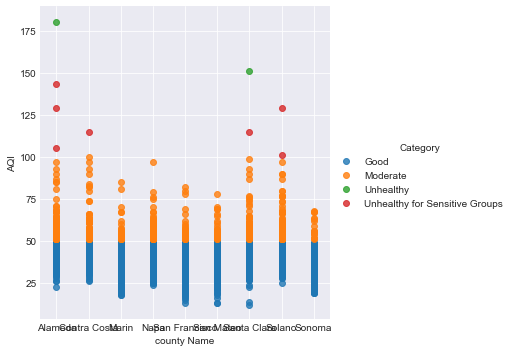

In [67]:
#AQI Distribution for each measurement date
sns.lmplot( x="county Name", y="AQI", data=sfb17_data, fit_reg=False, hue='Category', legend=True)

In [ ]:
#################################################################################################

In [ ]:
########## AIR NOW API Data: 2017 East Bay Fires (October 9th-15th) Case Study, 2017 #############

In [ ]:
    # IMPORTANT: AIRNOW API has a 500 hourly request limit per user

Zip_csv = "Raw_Data/countyData.csv" # csv containing the Zip codes we wish to sample for the Bay Area
Zip_data = pd.read_csv(Zip_csv)
Zip_data = Zip_data.head(441) # 441 is the total number of Zip Codes for our 9 selected Bay Area counties
Zip_data = Zip_data.sample(frac=1)

apikey = "9A3C2971-7F57-4B80-8908-B2A548BD66FD"
x=0
date_range = ["09","10","11","12","13","14","15"]
i=0
airnow_list=[]
count = 0
for row in Zip_data.itertuples(index=True, name='Pandas'):
   count=count+1
   print (getattr(row, "County"), getattr(row, "Zipcode"))
   zipcode = getattr(row, "Zipcode")
   print(zipcode)
   if (i<7):
       date = "2017-10-"+str(date_range[i])+"T00-0000"
       print(date)
       i=i+1
   else:
       i=0
   
   base_url = "http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode="+str(zipcode)+"&date="+date+"&distance=25&API_KEY="+apikey
   print(base_url)
   response =  requests.get(base_url).json()
#     print(response)
   airnow_list.append({ str(zipcode): response })
   df1 = pd.concat([pd.concat({k: pd.DataFrame(v) for k, v in x.items()}) for x in airnow_list]).reset_index(level=1, drop=True).reset_index().rename(columns={'index':'zip'})

In [7]:
    #Save to csv
# df.to_csv("AirNow_data_Hadrien.csv")
# df1.to_csv("AirNow_data_Hadrien_2.csv")

#Import csv as pd
AirNow_1_csv = "Raw_Data/AirNow_data_Hadrien.csv"
AirNow_1_df = pd.read_csv(AirNow_1_csv)
AirNow_2_csv = "Raw_Data/AirNow_data_Hadrien_2.csv"
AirNow_2_df = pd.read_csv(AirNow_2_csv)

print(AirNow_1_df.shape)
print(AirNow_2_df.shape)
print('---------------')
print(AirNow_1_df.AQI.describe())
print('---------------')
print(AirNow_2_df.AQI.describe())

(828, 12)
(834, 12)
---------------
count    828.000000
mean      68.799517
std       39.211064
min       11.000000
25%       40.000000
50%       54.000000
75%       84.000000
max      221.000000
Name: AQI, dtype: float64
---------------
count    834.000000
mean      69.523981
std       40.428616
min       19.000000
25%       41.000000
50%       54.000000
75%       84.000000
max      265.000000
Name: AQI, dtype: float64


In [ ]:
####################################### PLOTS ####################################################

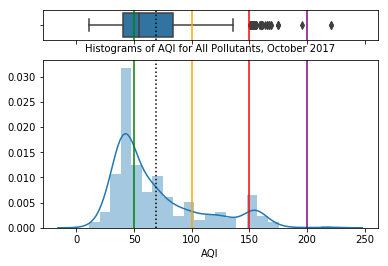

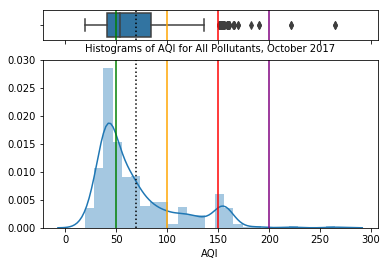

In [8]:
        ## Histogram of the distribution of AQI for Oct. 9th-15th

#First DF
dfair_Avg_AQI = AirNow_1_df.AQI.mean()

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part
sns.boxplot(AirNow_1_df.AQI, ax=ax_box)
sns.distplot(AirNow_1_df.AQI, ax=ax_hist)
plt.axvline(dfair_Avg_AQI, linestyle="dotted",color='black')

plt.axvline(50, color='g')
plt.axvline(100, color='orange')
plt.axvline(150, color='r')
plt.axvline(200, color='purple')


# Remove x axis name for the boxplot
ax_box.set(xlabel='Histograms of AQI for All Pollutants, October 2017')
ax_box.axvline(dfair_Avg_AQI, linestyle="dotted",color='black')
ax_box.axvline(50, color='g')
ax_box.axvline(100, color='orange')
ax_box.axvline(150, color='r')
ax_box.axvline(200, color='purple')

#####################################
#DF2
    
df_Avg_AQI = AirNow_2_df.AQI.mean()

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part
sns.boxplot(AirNow_2_df.AQI, ax=ax_box)
sns.distplot(AirNow_2_df.AQI, ax=ax_hist)
plt.axvline(df_Avg_AQI, linestyle="dotted",color='black')

plt.axvline(50, color='g')
plt.axvline(100, color='orange')
plt.axvline(150, color='r')
plt.axvline(200, color='purple')


# Remove x axis name for the boxplot
ax_box.set(xlabel='Histograms of AQI for All Pollutants, October 2017')
ax_box.axvline(df_Avg_AQI, linestyle="dotted",color='black')
ax_box.axvline(50, color='g')
ax_box.axvline(100, color='orange')
ax_box.axvline(150, color='r')
ax_box.axvline(200, color='purple')

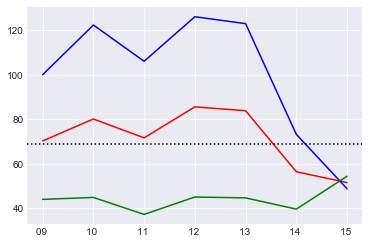

In [56]:
        ## Timeseries of AQI for Oct. 9th-15th

#Bin by Day
AirNow_1_df['Day']=AirNow_1_df.DateObserved.apply(lambda x: str(x)[8:])
AirNow_1_df['Day']

AirNow_1_df_day_m = AirNow_1_df.groupby("Day").mean()
AirNow_1_df_m = AirNow_1_df.AQI.mean()
AQI_m_perday = AirNow_1_df_day_m.AQI
AQI_m_perday #Trendline

pm25_m = AirNow_1_df[AirNow_1_df["ParameterName"] == 'PM2.5'].groupby('Day').mean()
pm25_m = pm25_m.AQI
ozone_m = AirNow_1_df[AirNow_1_df["ParameterName"] == 'OZONE'].groupby('Day').mean()
ozone_m = ozone_m.AQI

#Avg. AQI per day during Oct. 9th-15th 2017
sns.set_style("darkgrid")
plt.plot(AQI_m_perday,color='red')
plt.plot(pm25_m,color='blue')
plt.plot(ozone_m,color='green')

plt.axhline(AirNow_1_df_m, linestyle="dotted",color='black')


plt.show()

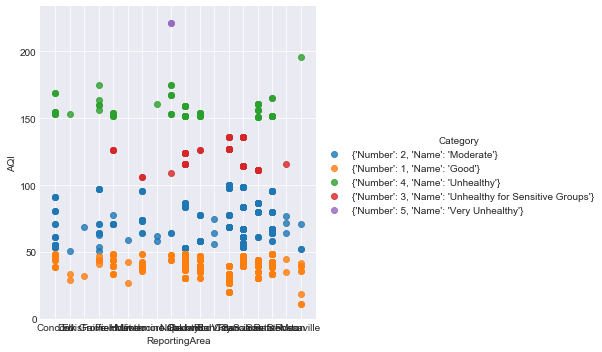

In [69]:
#AQI Distribution for each measurement date
sns.lmplot( x="ReportingArea", y="AQI", data=AirNow_1_df, fit_reg=False, hue='Category', legend=True)